# Notebook to run bayesian models

This notebook runs the bayesian linear regression models and the mixed effects models. It is done in notebook form as notebooks keep the diagnostics in the cell output. 

Bayesian model analysis is done in the bayes_model_analysis notebook

In [2]:
from functions.data_functions import load_data, save_pickle, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import bambi as bmb
import arviz as az

## Read in data and preprocess data

In [3]:
pca_df = load_data('BEACON', 'pca_df')

In [16]:
comp = ['comp_1', 'comp_2','comp_3']

In [5]:
for component in comp:
    pca_df[f'{component}_t1_demean'] = pca_df[f'{component}_t1'] - pca_df[f'{component}_t1'].mean()

pca_df['group_ind'] = pca_df['group'].apply(lambda group: 0 if group =='HC' else 1)

In [6]:
pca_df

,index,G_Number,comp_1_t1,comp_2_t1,comp_3_t1,B_Number,comp_1_t2,comp_2_t2,comp_3_t2,group,comp_1_t1_demean,comp_2_t1_demean,comp_3_t1_demean,group_ind
0,0,G1038,-3.397712,-0.039728,0.044067,B1002,-2.751847,-1.763316,2.199746,HC,-3.397712,-0.039728,0.044067,0
1,1,G1010,-3.759757,-0.312506,0.406467,B1003,-3.441539,-0.316748,-0.210088,HC,-3.759757,-0.312506,0.406467,0
2,2,G1014,-3.532270,-0.211892,0.493511,B1004,-1.389329,0.311159,0.983941,HC,-3.532270,-0.211892,0.493511,0
3,3,G1056,-2.459692,-0.062705,-0.095992,B1006,-1.050591,1.116984,0.019420,HC,-2.459692,-0.062705,-0.095992,0
4,4,G1023,-1.476319,-0.129427,1.175674,B1007,-1.181176,-0.783917,0.744101,HC,-1.476319,-0.129427,1.175674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,G2141,2.462581,-0.667664,-0.436650,B2091,2.025310,1.042486,-0.784687,AN,2.462581,-0.667664,-0.436650,1
130,130,G2138,-1.634660,-0.686854,-1.347601,B2092,0.157375,-0.139806,-0.360662,AN,-1.634660,-0.686854,-1.347601,1
131,131,G2140,2.637032,-2.079384,-1.025924,B2093,3.998414,-2.064403,-1.245633,AN,2.637032,-2.079384,-1.025924,1
132,132,G2105,2.295672,-0.339904,0.279827,B2094,4.474773,-1.406758,0.090732,AN,2.295672,-0.339904,0.279827,1


In [7]:
pca_df.columns

Index(['index', 'G_Number', 'comp_1_t1', 'comp_2_t1', 'comp_3_t1', 'B_Number',
       'comp_1_t2', 'comp_2_t2', 'comp_3_t2', 'group', 'comp_1_t1_demean',
       'comp_2_t1_demean', 'comp_3_t1_demean', 'group_ind'],
      dtype='object')

In [8]:
pca_df

,index,G_Number,comp_1_t1,comp_2_t1,comp_3_t1,B_Number,comp_1_t2,comp_2_t2,comp_3_t2,group,comp_1_t1_demean,comp_2_t1_demean,comp_3_t1_demean,group_ind
0,0,G1038,-3.397712,-0.039728,0.044067,B1002,-2.751847,-1.763316,2.199746,HC,-3.397712,-0.039728,0.044067,0
1,1,G1010,-3.759757,-0.312506,0.406467,B1003,-3.441539,-0.316748,-0.210088,HC,-3.759757,-0.312506,0.406467,0
2,2,G1014,-3.532270,-0.211892,0.493511,B1004,-1.389329,0.311159,0.983941,HC,-3.532270,-0.211892,0.493511,0
3,3,G1056,-2.459692,-0.062705,-0.095992,B1006,-1.050591,1.116984,0.019420,HC,-2.459692,-0.062705,-0.095992,0
4,4,G1023,-1.476319,-0.129427,1.175674,B1007,-1.181176,-0.783917,0.744101,HC,-1.476319,-0.129427,1.175674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,G2141,2.462581,-0.667664,-0.436650,B2091,2.025310,1.042486,-0.784687,AN,2.462581,-0.667664,-0.436650,1
130,130,G2138,-1.634660,-0.686854,-1.347601,B2092,0.157375,-0.139806,-0.360662,AN,-1.634660,-0.686854,-1.347601,1
131,131,G2140,2.637032,-2.079384,-1.025924,B2093,3.998414,-2.064403,-1.245633,AN,2.637032,-2.079384,-1.025924,1
132,132,G2105,2.295672,-0.339904,0.279827,B2094,4.474773,-1.406758,0.090732,AN,2.295672,-0.339904,0.279827,1


In [36]:
draw_numb = 2000
tune_numb = 2000
target_accept_numb = 0.99

In [17]:
dfs = {}

for component in comp:
    print(component)
    comp_df = pca_df[['G_Number', 
           f'{component}_t2', f'{component}_t1_demean','group', 
           ]].rename(columns={f'{component}_t1_demean':'t1', f'{component}_t2':'t2', 'G_Number':'participants'})
           
    comp_df['id'] = comp_df.index
    comp_df = pd.melt(comp_df, value_vars=['t2','t1'], id_vars='participants').sort_values(by=['participants'], ascending=True).reset_index(drop=True)
    comp_df['group'] = comp_df['participants'].apply(lambda group: 'HC' if 'G1' in group else 'AN')

    dfs[component] = comp_df


comp_1
comp_2
comp_3


In [20]:
dfs['comp_3']

,participants,variable,value,group
0,G1002,t1,-0.383005,HC
1,G1002,t2,-0.688601,HC
2,G1004,t1,-0.298822,HC
3,G1004,t2,1.108222,HC
4,G1006,t1,1.379646,HC
...,...,...,...,...
263,G2140,t2,-1.245633,AN
264,G2141,t1,-0.436650,AN
265,G2141,t2,-0.784687,AN
266,G2142,t2,-0.111054,AN


In [41]:
model_parameters = {
    'alt':{} ,
    'null':{} 

}

for component in comp:

    alt_model = bmb.Model('value ~ group + variable + (0 + 1|group) + (0 + variable|group)', dfs[component])
    model_parameters['alt'][component] = alt_model
    null_model = bmb.Model('value ~ (1|participants) + (variable|participants)', dfs[component])
    model_parameters['null'][component] = null_model


In [ ]:
print(model_parameters['alt']['comp_1'])

Formula: value ~ group + variable + (0 + 1|group) + (0 + variable|group)
Family name: Gaussian
Link: identity
Observations: 268
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0.0, sigma: 9.3711)
    group ~ Normal(mu: 0.0, sigma: 13.1492)
    variable ~ Normal(mu: 0.0, sigma: 12.0342)

  Group-level effects
    1|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 9.3711))
    variable|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 12.0342))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.4068)


In [ ]:
fitted_models = {
    'alt': {},
    'null': {}
}

for model in comp:

    fitted = model_parameters['alt'][model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    fitted_models['alt'][model] = fitted
    null_fitted = model_parameters['null'][model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    fitted_models['null'][model] = null_fitted


In [ ]:
save_pickle('long_fitted_models',  fitted_models)

array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'group'}>,
        <AxesSubplot: title={'center': 'group'}>],
       [<AxesSubplot: title={'center': 'variable'}>,
        <AxesSubplot: title={'center': 'variable'}>],
       [<AxesSubplot: title={'center': '1|group_sigma'}>,
        <AxesSubplot: title={'center': '1|group_sigma'}>],
       [<AxesSubplot: title={'center': 'variable|group_sigma'}>,
        <AxesSubplot: title={'center': 'variable|group_sigma'}>],
       [<AxesSubplot: title={'center': 'value_sigma'}>,
        <AxesSubplot: title={'center': 'value_sigma'}>],
       [<AxesSubplot: title={'center': '1|group'}>,
        <AxesSubplot: title={'center': '1|group'}>],
       [<AxesSubplot: title={'center': 'variable|group'}>,
        <AxesSubplot: title={'center': 'variable|group'}>]], dtype=object)

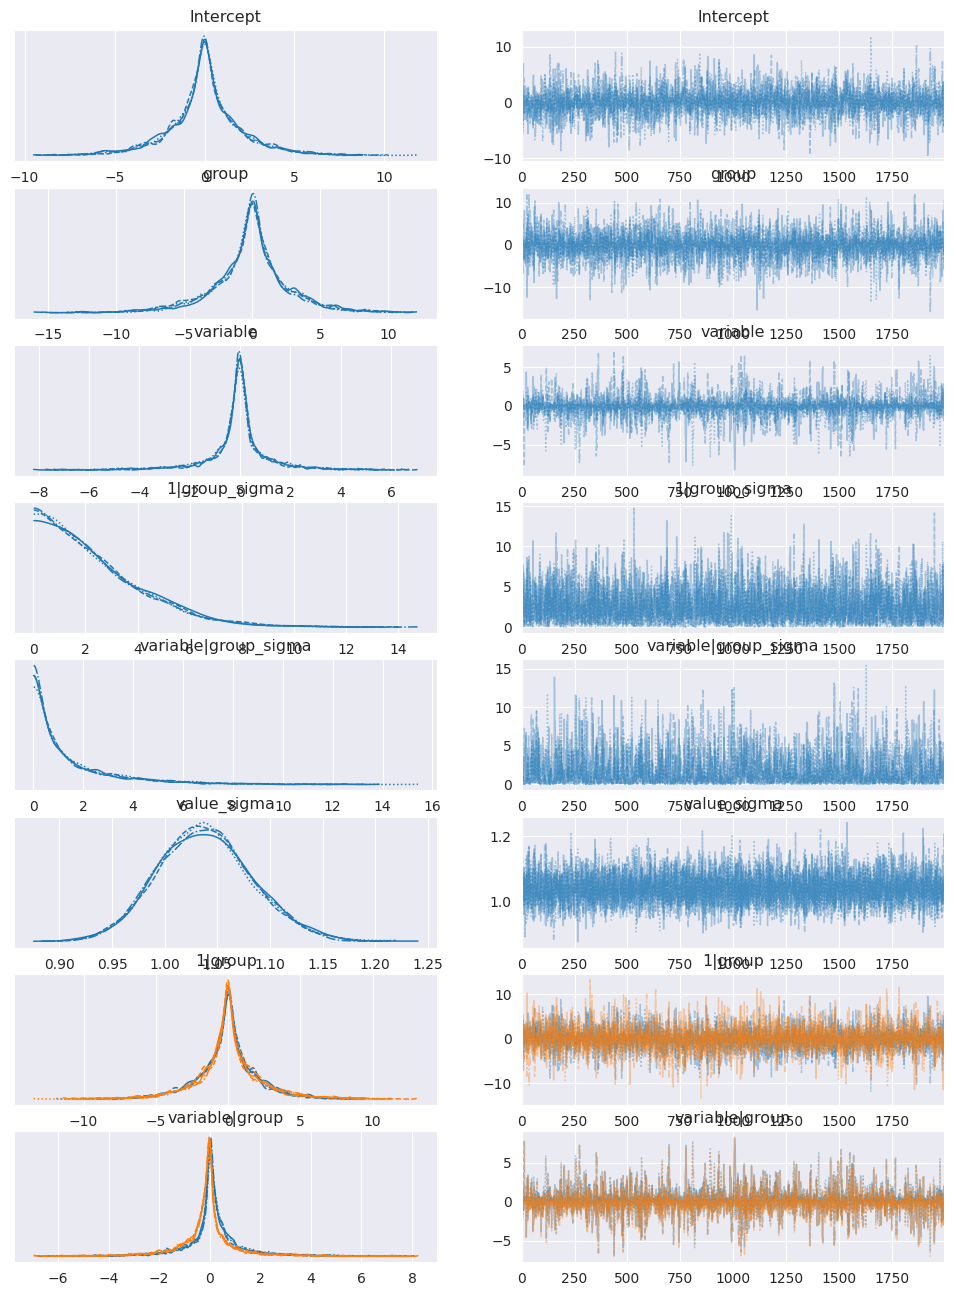

In [15]:
az.plot_trace(fitted)

In [16]:
az.summary(fitted)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.053,2.078,-4.052,4.413,0.037,0.026,3214.0,3659.0,1.0
group[HC],-0.105,2.814,-5.776,5.646,0.047,0.034,3692.0,3954.0,1.0
variable[t2],-0.070,1.267,-2.750,2.556,0.027,0.020,2788.0,2375.0,1.0
1|group_sigma,2.402,1.966,0.000,5.876,0.033,0.023,2803.0,2973.0,1.0
variable|group_sigma[t2],1.530,1.837,0.000,5.016,0.038,0.027,1724.0,3056.0,1.0
value_sigma,1.039,0.045,0.951,1.122,0.001,0.000,6817.0,4753.0,1.0
1|group[AN],-0.052,2.078,-4.325,4.125,0.037,0.026,3213.0,3597.0,1.0
1|group[HC],0.058,2.319,-4.294,5.131,0.039,0.029,3864.0,3644.0,1.0
"variable|group[t2, AN]",0.130,1.266,-2.525,2.778,0.027,0.020,2777.0,2295.0,1.0
"variable|group[t2, HC]",-0.083,1.266,-2.701,2.653,0.027,0.020,2726.0,2254.0,1.0


<AxesSubplot: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

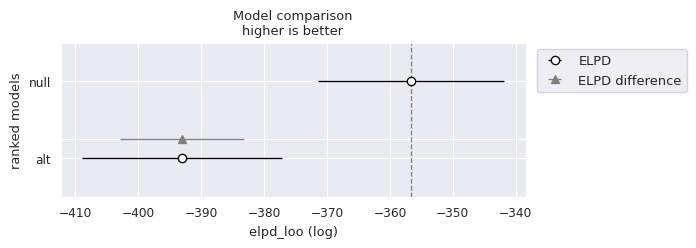

In [17]:
compare_models = az.compare({'alt':fitted, 'null':null_fitted})
az.plot_compare(compare_models)

<AxesSubplot: title={'center': 'variable|group'}>

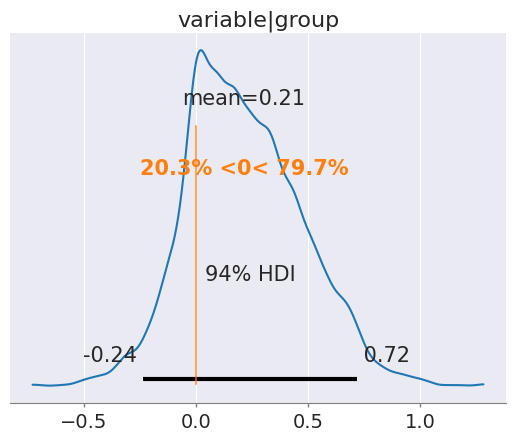

In [20]:
post_group = fitted.posterior["variable|group"]
post_group
#post_group
an_t1 = post_group.sel(group__factor_dim="AN").sel(variable__expr_dim='t2')
hc_t1 = post_group.sel(group__factor_dim="HC").sel(variable__expr_dim='t2')
diff = an_t1 - hc_t1
#diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
az.plot_posterior(diff, ref_val=0)

array([[<AxesSubplot: title={'center': 'Intercept\n0'}>,
        <AxesSubplot: title={'center': 'Intercept\n1'}>,
        <AxesSubplot: title={'center': 'Intercept\n2'}>,
        <AxesSubplot: title={'center': 'Intercept\n3'}>],
       [<AxesSubplot: title={'center': 'group\n0, HC'}>,
        <AxesSubplot: title={'center': 'group\n1, HC'}>,
        <AxesSubplot: title={'center': 'group\n2, HC'}>,
        <AxesSubplot: title={'center': 'group\n3, HC'}>],
       [<AxesSubplot: title={'center': 'variable\n0, t2'}>,
        <AxesSubplot: title={'center': 'variable\n1, t2'}>,
        <AxesSubplot: title={'center': 'variable\n2, t2'}>,
        <AxesSubplot: title={'center': 'variable\n3, t2'}>],
       [<AxesSubplot: title={'center': '1|group_sigma\n0'}>,
        <AxesSubplot: title={'center': '1|group_sigma\n1'}>,
        <AxesSubplot: title={'center': '1|group_sigma\n2'}>,
        <AxesSubplot: title={'center': '1|group_sigma\n3'}>],
       [<AxesSubplot: title={'center': 'variable|group_s

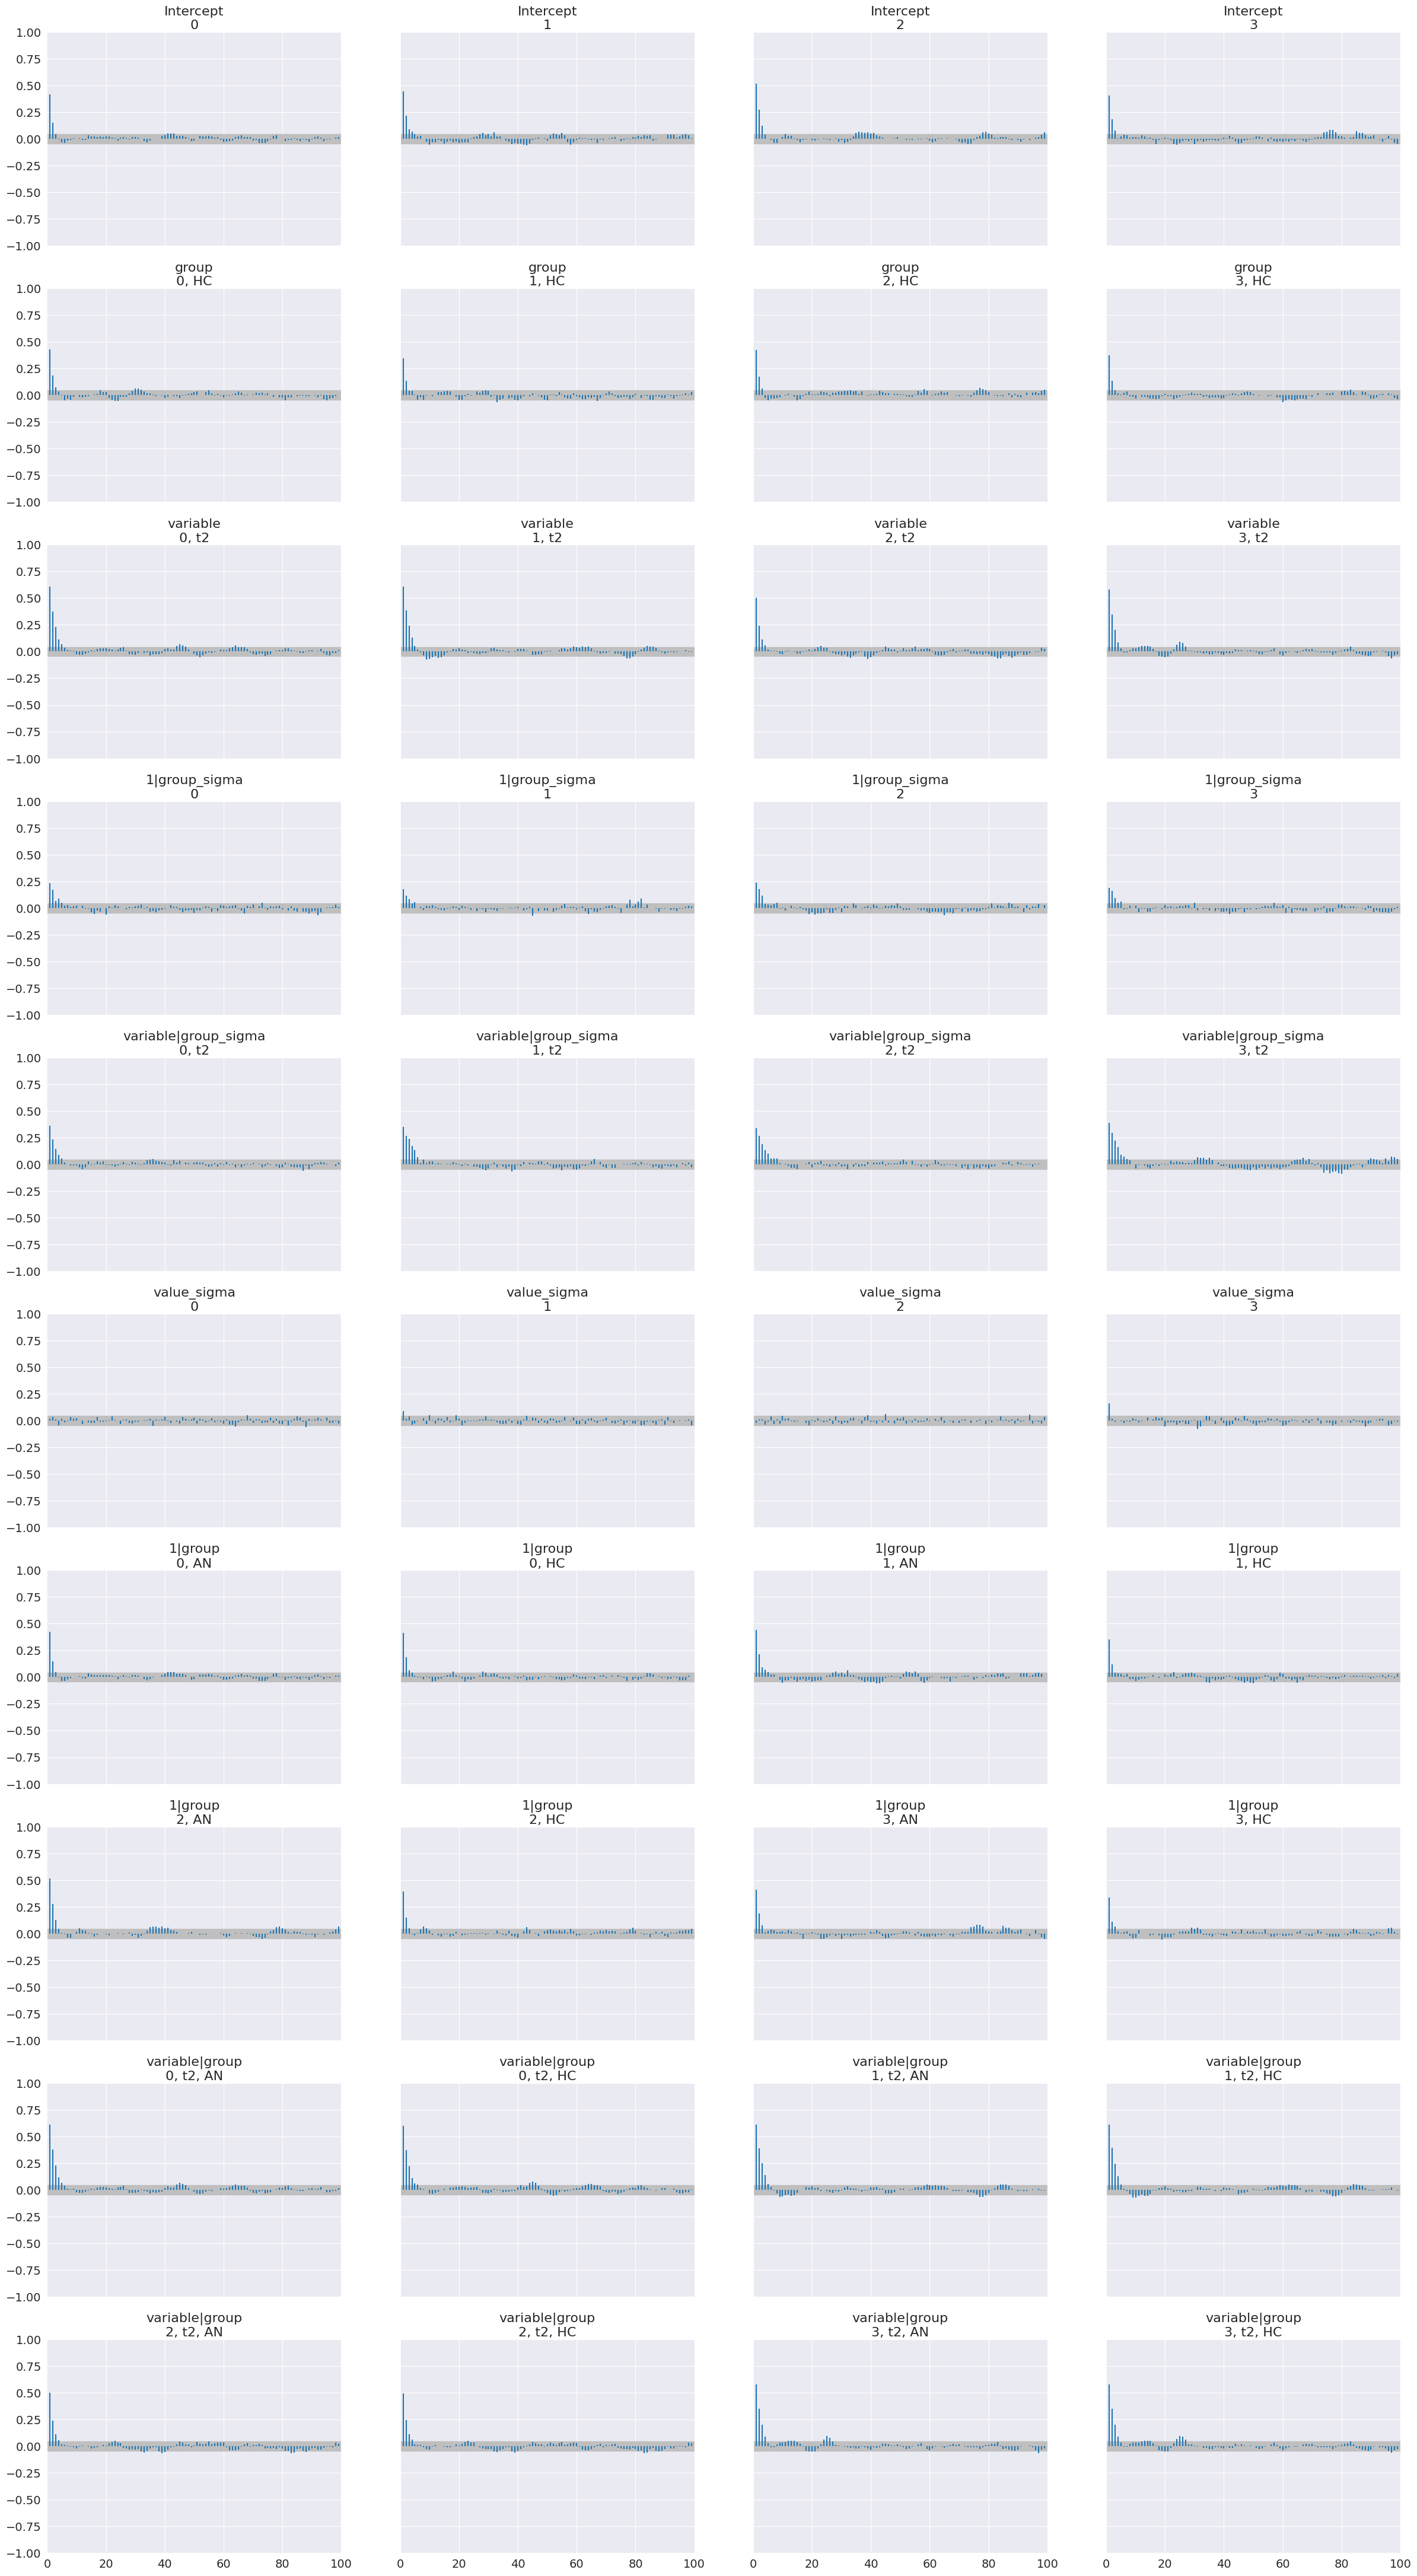

In [19]:
az.plot_autocorr(fitted)